# Bernstein-Vazirani Algorithm

## É considerado uma extensão do algoritmo de Deutsch-Jozsa

    Temos a mesma função desconhecida que dado um número de bits como entrada, a função retorna 0 ou 1.
    No entanto, tal função agora é dada por:

        f(x_0, x_1, x_2, ...) = s_0x_0 + s_1x_1 + ... + s_nx_n (mod(2)) = s.x(mod2)

    Onde s é uma string binária secreta que define a função. Ela é justamente o que queremos descobrir.
    Podemos resolver tal problema classicamente e quanticamente.

    Classicamente:
        Temos que rodar a função n vezes, onde n é o número de bits do input. Para cada rodada,
        basta settar um dos elementos de s como 1 e o resto como 0 e com isso saberemos o valor de uma componente de s
        para cada rodada.

        f(x_0=1, x_1=0, x_2=0, ...) = 1x_0 = 0 ou 1 sabido.

    Quanticamente:
        Através de algoritmos quânticos, é possível saber com 100% de certeza os valores dos elementos de s

In [8]:
# initialization
import matplotlib.pyplot as plt
import numpy as np
import warnings
from matplotlib import style
%matplotlib inline

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram

warnings.filterwarnings("ignore")
style.use("dark_background")

In [16]:
n = 8 # number of qubits used to represent s
s = '11101101'   # the hidden binary string

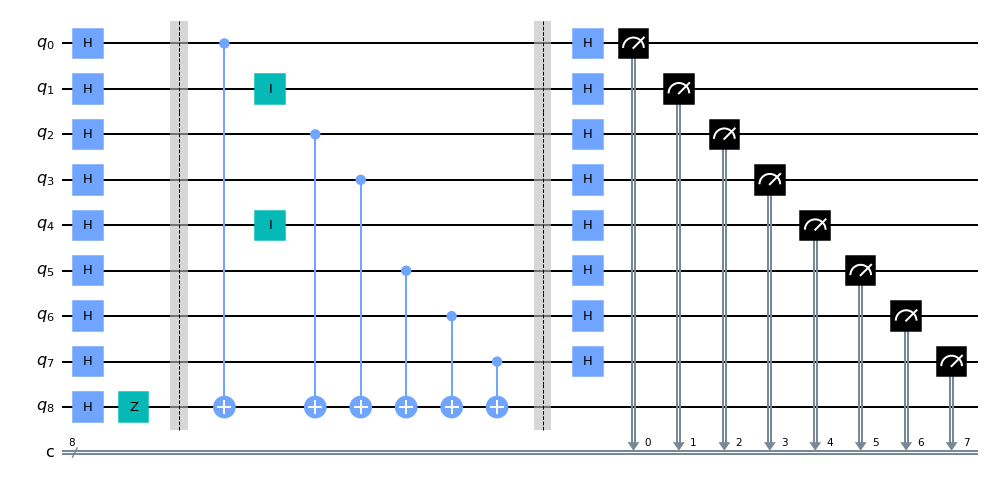

In [17]:
# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put auxiliary in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw(output="mpl")

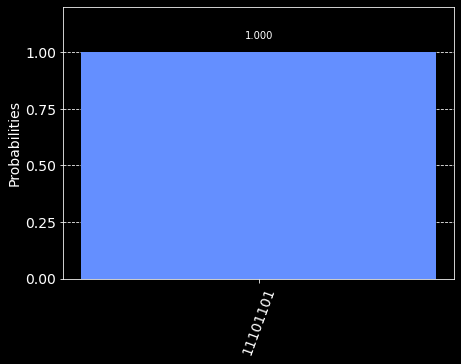

In [18]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
results = aer_sim.run(bv_circuit).result()
answer = results.get_counts()

plot_histogram(answer)